# 2. Complete Applied Question #13 on pages 196 and 1972 of ISLR Python. 

In [1]:
from ISLP import load_data
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Load Weekly dataset
Weekly = load_data('Weekly')
Weekly = pd.DataFrame(Weekly)  # convert to pandas DataFrame
Weekly.head()



C:\Users\alber\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:61: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
0,1990,0.816,1.572,-3.936,-0.229,-3.484,0.154976,-0.270,Down
1,1990,-0.270,0.816,1.572,-3.936,-0.229,0.148574,-2.576,Down
2,1990,-2.576,-0.270,0.816,1.572,-3.936,0.159837,3.514,Up
3,1990,3.514,-2.576,-0.270,0.816,1.572,0.161630,0.712,Up
4,1990,0.712,3.514,-2.576,-0.270,0.816,0.153728,1.178,Up


In [2]:
# Summary info
Weekly_info=pd.DataFrame(Weekly.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1089 entries, 0 to 1088
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   Year       1089 non-null   int64   
 1   Lag1       1089 non-null   float64 
 2   Lag2       1089 non-null   float64 
 3   Lag3       1089 non-null   float64 
 4   Lag4       1089 non-null   float64 
 5   Lag5       1089 non-null   float64 
 6   Volume     1089 non-null   float64 
 7   Today      1089 non-null   float64 
 8   Direction  1089 non-null   category
dtypes: category(1), float64(7), int64(1)
memory usage: 69.4 KB


In [3]:
# Basic statistics
print(Weekly.describe())

              Year         Lag1         Lag2         Lag3         Lag4  \
count  1089.000000  1089.000000  1089.000000  1089.000000  1089.000000   
mean   2000.048669     0.150585     0.151079     0.147205     0.145818   
std       6.033182     2.357013     2.357254     2.360502     2.360279   
min    1990.000000   -18.195000   -18.195000   -18.195000   -18.195000   
25%    1995.000000    -1.154000    -1.154000    -1.158000    -1.158000   
50%    2000.000000     0.241000     0.241000     0.241000     0.238000   
75%    2005.000000     1.405000     1.409000     1.409000     1.409000   
max    2010.000000    12.026000    12.026000    12.026000    12.026000   

              Lag5       Volume        Today  
count  1089.000000  1089.000000  1089.000000  
mean      0.139893     1.574618     0.149899  
std       2.361285     1.686636     2.356927  
min     -18.195000     0.087465   -18.195000  
25%      -1.166000     0.332022    -1.154000  
50%       0.234000     1.002680     0.241000  
75% 

C:\Users\alber\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\alber\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


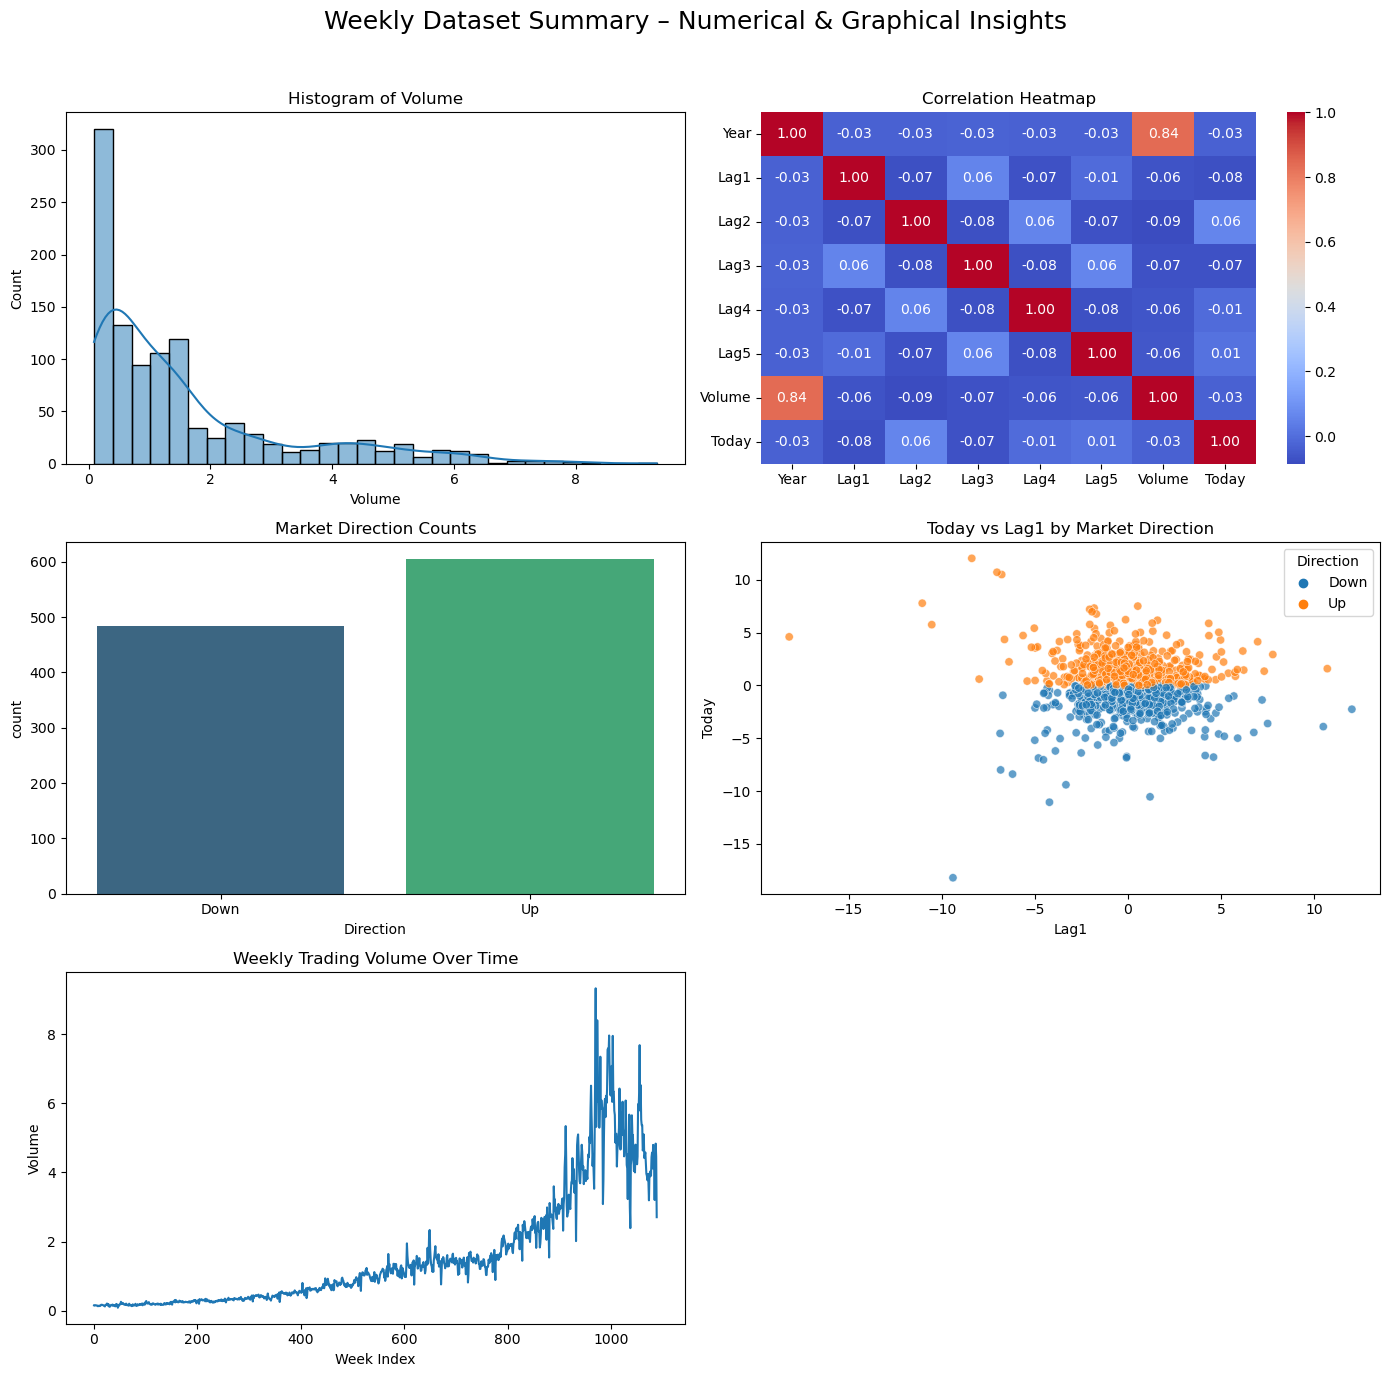

In [4]:

# Create figure with multiple subplots
fig, axes = plt.subplots(3, 2, figsize=(14, 14))

# Add main title at the top (adjust y so it doesn’t overlap)
fig.suptitle("Weekly Dataset Summary – Numerical & Graphical Insights", 
             fontsize=18, y=0.98)

# 1. Histogram of Volume
sns.histplot(Weekly['Volume'], bins=30, kde=True, ax=axes[0,0])
axes[0,0].set_title("Histogram of Volume")

# 2. Correlation heatmap
sns.heatmap(Weekly.corr(numeric_only=True), annot=True, cmap="coolwarm", fmt=".2f", ax=axes[0,1])
axes[0,1].set_title("Correlation Heatmap")

# 3. Direction counts
sns.countplot(x='Direction', data=Weekly, palette="viridis", ax=axes[1,0])
axes[1,0].set_title("Market Direction Counts")

# 4. Scatter: Today vs Lag1
sns.scatterplot(x='Lag1', y='Today', hue='Direction', data=Weekly, alpha=0.7, ax=axes[1,1])
axes[1,1].set_title("Today vs Lag1 by Market Direction")

# 5. Volume over time
axes[2,0].plot(Weekly['Volume'])
axes[2,0].set_title("Weekly Trading Volume Over Time")
axes[2,0].set_xlabel("Week Index")
axes[2,0].set_ylabel("Volume")

# Hide the empty subplot (2,1)
axes[2,1].axis('off')

plt.tight_layout(rect=[0, 0, 1, 0.96])  # leave space for the main title
plt.show()

In [5]:
import pandas as pd
import statsmodels.api as sm
from ISLP import load_data

# Load Weekly dataset
Weekly = load_data('Weekly')
Weekly = pd.DataFrame(Weekly)

# Encode Direction (Up = 1, Down = 0)
Weekly['Direction'] = (Weekly['Direction'] == 'Up').astype(int)

# Define predictors and response
X = Weekly[['Lag1', 'Lag2', 'Lag3', 'Lag4', 'Lag5', 'Volume']]
y = Weekly['Direction']

# Add constant for intercept
X = sm.add_constant(X)

# Fit logistic regression model
logit_model = sm.Logit(y, X).fit()

# Print summary results
print(logit_model.summary())


Optimization terminated successfully.
         Current function value: 0.682441
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:              Direction   No. Observations:                 1089
Model:                          Logit   Df Residuals:                     1082
Method:                           MLE   Df Model:                            6
Date:                Tue, 19 Aug 2025   Pseudo R-squ.:                0.006580
Time:                        20:10:13   Log-Likelihood:                -743.18
converged:                       True   LL-Null:                       -748.10
Covariance Type:            nonrobust   LLR p-value:                    0.1313
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2669      0.086      3.106      0.002       0.098       0.435
Lag1          -0.0413      0.

In [6]:

from sklearn.metrics import confusion_matrix, accuracy_score

# Predicted probabilities
y_pred_prob = logit_model.predict(X)

# Convert probabilities to class predictions (threshold = 0.5)
y_pred = (y_pred_prob > 0.5).astype(int)

# Compute confusion matrix
cm = confusion_matrix(y, y_pred)
acc = accuracy_score(y, y_pred)

print("Confusion Matrix:\n", cm)
print("\nOverall Accuracy:", acc)


Confusion Matrix:
 [[ 54 430]
 [ 48 557]]

Overall Accuracy: 0.5610651974288338


In [7]:

import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.metrics import confusion_matrix, accuracy_score
from ISLP import load_data

# --- Load Weekly and clean Direction safely ---
Weekly = pd.DataFrame(load_data('Weekly')).copy()

# Force strings, trim whitespace, and map to 0/1
dir_clean = Weekly['Direction'].astype(str).str.strip()
Weekly['Direction_bin'] = dir_clean.map({'Up': 1, 'Down': 0})

# Diagnose mapping issues
bad_mask = ~Weekly['Direction_bin'].isin([0, 1])
if bad_mask.any():
    print("Found unmapped Direction values. Here they are with counts:")
    print(dir_clean[bad_mask].value_counts(dropna=False))
    # If any bads exist, you can decide to drop them:
    Weekly = Weekly.loc[~bad_mask].copy()

# Ensure no NaNs in response for the time windows
Weekly = Weekly.dropna(subset=['Direction_bin', 'Lag2', 'Year'])

# --- Time split ---
train_mask = (Weekly['Year'] >= 1990) & (Weekly['Year'] <= 2008)
test_mask  = (Weekly['Year'] >= 2009) & (Weekly['Year'] <= 2010)

X_train = Weekly.loc[train_mask, ['Lag2']]
y_train = Weekly.loc[train_mask, 'Direction_bin'].astype(int)

X_test  = Weekly.loc[test_mask, ['Lag2']]
y_test  = Weekly.loc[test_mask, 'Direction_bin'].astype(int)

# Sanity checks
assert set(y_train.unique()).issubset({0,1}), f"y_train has non-binary values: {y_train.unique()}"
assert set(y_test.unique()).issubset({0,1}), f"y_test has non-binary values: {y_test.unique()}"

# Add intercept
X_train_sm = sm.add_constant(X_train, has_constant='add')
X_test_sm  = sm.add_constant(X_test,  has_constant='add')

# --- Fit logistic regression (Lag2 only) ---
logit = sm.Logit(y_train, X_train_sm).fit(disp=True)
print(logit.summary())

# --- Predict on 2009–2010 and evaluate ---
proba = logit.predict(X_test_sm)
y_pred = (proba >= 0.5).astype(int)

cm = confusion_matrix(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)

print("\nConfusion Matrix (rows=actual, cols=predicted):\n", cm)
print("Overall fraction correct (accuracy): {:.3f}".format(acc))


Optimization terminated successfully.
         Current function value: 0.685555
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:          Direction_bin   No. Observations:                  985
Model:                          Logit   Df Residuals:                      983
Method:                           MLE   Df Model:                            1
Date:                Tue, 19 Aug 2025   Pseudo R-squ.:                0.003076
Time:                        20:10:13   Log-Likelihood:                -675.27
converged:                       True   LL-Null:                       -677.35
Covariance Type:            nonrobust   LLR p-value:                   0.04123
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2033      0.064      3.162      0.002       0.077       0.329
Lag2           0.0581      0.

In [8]:
import pandas as pd
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import confusion_matrix, accuracy_score
from ISLP import load_data

# --- Load Weekly data ---
Weekly = pd.DataFrame(load_data('Weekly')).copy()

# Encode Direction as binary: Up=1, Down=0
Weekly['Direction_bin'] = Weekly['Direction'].map({'Up': 1, 'Down': 0})

# Train/test split
train_mask = (Weekly['Year'] >= 1990) & (Weekly['Year'] <= 2008)
test_mask  = (Weekly['Year'] >= 2009) & (Weekly['Year'] <= 2010)

X_train = Weekly.loc[train_mask, ['Lag2']]
y_train = Weekly.loc[train_mask, 'Direction_bin']

X_test  = Weekly.loc[test_mask, ['Lag2']]
y_test  = Weekly.loc[test_mask, 'Direction_bin']

# --- Fit LDA model ---
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)

# Predict on 2009–2010
y_pred = lda.predict(X_test)

# --- Confusion matrix & accuracy ---
cm = confusion_matrix(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)

print("Confusion Matrix (rows=actual, cols=predicted):\n", cm)
print("Overall fraction correct (accuracy): {:.3f}".format(acc))


Confusion Matrix (rows=actual, cols=predicted):
 [[ 9 34]
 [ 5 56]]
Overall fraction correct (accuracy): 0.625


In [9]:
import pandas as pd
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import confusion_matrix, accuracy_score
from ISLP import load_data

# --- Load Weekly data ---
Weekly = pd.DataFrame(load_data('Weekly')).copy()

# Encode Direction as binary: Up=1, Down=0
Weekly['Direction_bin'] = Weekly['Direction'].map({'Up': 1, 'Down': 0})

# Train/test split
train_mask = (Weekly['Year'] >= 1990) & (Weekly['Year'] <= 2008)
test_mask  = (Weekly['Year'] >= 2009) & (Weekly['Year'] <= 2010)

X_train = Weekly.loc[train_mask, ['Lag2']]
y_train = Weekly.loc[train_mask, 'Direction_bin']

X_test  = Weekly.loc[test_mask, ['Lag2']]
y_test  = Weekly.loc[test_mask, 'Direction_bin']

# --- Fit QDA model ---
qda = QuadraticDiscriminantAnalysis()
qda.fit(X_train, y_train)

# Predict on 2009–2010
y_pred = qda.predict(X_test)

# --- Confusion matrix & accuracy ---
cm = confusion_matrix(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)

print("Confusion Matrix (rows=actual, cols=predicted):\n", cm)
print("Overall fraction correct (accuracy): {:.3f}".format(acc))


Confusion Matrix (rows=actual, cols=predicted):
 [[ 0 43]
 [ 0 61]]
Overall fraction correct (accuracy): 0.587


In [10]:
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from ISLP import load_data

# --- Load Weekly data ---
Weekly = pd.DataFrame(load_data('Weekly')).copy()

# Encode Direction as binary: Up=1, Down=0
Weekly['Direction_bin'] = Weekly['Direction'].map({'Up': 1, 'Down': 0})

# Train/test split
train_mask = (Weekly['Year'] >= 1990) & (Weekly['Year'] <= 2008)
test_mask  = (Weekly['Year'] >= 2009) & (Weekly['Year'] <= 2010)

X_train = Weekly.loc[train_mask, ['Lag2']]
y_train = Weekly.loc[train_mask, 'Direction_bin']

X_test  = Weekly.loc[test_mask, ['Lag2']]
y_test  = Weekly.loc[test_mask, 'Direction_bin']

# --- Fit KNN model with K=1 ---
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)

# Predict on 2009–2010
y_pred = knn.predict(X_test)

# --- Confusion matrix & accuracy ---
cm = confusion_matrix(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)

print("Confusion Matrix (rows=actual, cols=predicted):\n", cm)
print("Overall fraction correct (accuracy): {:.3f}".format(acc))


Confusion Matrix (rows=actual, cols=predicted):
 [[22 21]
 [31 30]]
Overall fraction correct (accuracy): 0.500


In [11]:
import pandas as pd
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, accuracy_score
from ISLP import load_data

# --- Load Weekly data ---
Weekly = pd.DataFrame(load_data('Weekly')).copy()

# Encode Direction as binary: Up=1, Down=0
Weekly['Direction_bin'] = Weekly['Direction'].map({'Up': 1, 'Down': 0})

# Train/test split
train_mask = (Weekly['Year'] >= 1990) & (Weekly['Year'] <= 2008)
test_mask  = (Weekly['Year'] >= 2009) & (Weekly['Year'] <= 2010)

X_train = Weekly.loc[train_mask, ['Lag2']]
y_train = Weekly.loc[train_mask, 'Direction_bin']

X_test  = Weekly.loc[test_mask, ['Lag2']]
y_test  = Weekly.loc[test_mask, 'Direction_bin']

# --- Fit Naive Bayes model ---
nb = GaussianNB()
nb.fit(X_train, y_train)

# Predict on 2009–2010
y_pred = nb.predict(X_test)

# --- Confusion matrix & accuracy ---
cm = confusion_matrix(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)

print("Confusion Matrix (rows=actual, cols=predicted):\n", cm)
print("Overall fraction correct (accuracy): {:.3f}".format(acc))


Confusion Matrix (rows=actual, cols=predicted):
 [[ 0 43]
 [ 0 61]]
Overall fraction correct (accuracy): 0.587


In [12]:
import pandas as pd
from ISLP import load_data
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.preprocessing import PolynomialFeatures

# --- Load Weekly data ---
Weekly = pd.DataFrame(load_data('Weekly')).copy()
Weekly['Direction_bin'] = Weekly['Direction'].map({'Up': 1, 'Down': 0})

# Train/test split
train_mask = (Weekly['Year'] >= 1990) & (Weekly['Year'] <= 2008)
test_mask  = (Weekly['Year'] >= 2009) & (Weekly['Year'] <= 2010)

def evaluate_model(model, X_train, y_train, X_test, y_test, label):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    acc = accuracy_score(y_test, y_pred)
    print(f"\nMethod: {label}")
    print("Confusion Matrix (rows=actual, cols=predicted):\n", cm)
    print("Accuracy:", round(acc, 3))
    return acc, cm

# Define predictors
X_train_base = Weekly.loc[train_mask, ['Lag2']]
y_train = Weekly.loc[train_mask, 'Direction_bin']
X_test_base  = Weekly.loc[test_mask, ['Lag2']]
y_test  = Weekly.loc[test_mask, 'Direction_bin']

# Logistic Regression (Lag2)
evaluate_model(LogisticRegression(), X_train_base, y_train, X_test_base, y_test, "Logistic Regression (Lag2)")

# LDA (Lag2)
evaluate_model(LinearDiscriminantAnalysis(), X_train_base, y_train, X_test_base, y_test, "LDA (Lag2)")

# QDA (Lag2)
evaluate_model(QuadraticDiscriminantAnalysis(), X_train_base, y_train, X_test_base, y_test, "QDA (Lag2)")

# Naive Bayes (Lag2)
evaluate_model(GaussianNB(), X_train_base, y_train, X_test_base, y_test, "Naive Bayes (Lag2)")

# KNN: try K = 1, 5, 10
for k in [1, 5, 10]:
    evaluate_model(KNeighborsClassifier(n_neighbors=k), X_train_base, y_train, X_test_base, y_test, f"KNN (K={k})")

# --- Polynomial transformation example: Lag2 + Lag2^2 ---
poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(Weekly.loc[train_mask, ['Lag2']])
X_test_poly = poly.transform(Weekly.loc[test_mask, ['Lag2']])
evaluate_model(LogisticRegression(), X_train_poly, y_train, X_test_poly, y_test, "Logistic Regression (Lag2 + Lag2^2)")



Method: Logistic Regression (Lag2)
Confusion Matrix (rows=actual, cols=predicted):
 [[ 9 34]
 [ 5 56]]
Accuracy: 0.625

Method: LDA (Lag2)
Confusion Matrix (rows=actual, cols=predicted):
 [[ 9 34]
 [ 5 56]]
Accuracy: 0.625

Method: QDA (Lag2)
Confusion Matrix (rows=actual, cols=predicted):
 [[ 0 43]
 [ 0 61]]
Accuracy: 0.587

Method: Naive Bayes (Lag2)
Confusion Matrix (rows=actual, cols=predicted):
 [[ 0 43]
 [ 0 61]]
Accuracy: 0.587

Method: KNN (K=1)
Confusion Matrix (rows=actual, cols=predicted):
 [[22 21]
 [31 30]]
Accuracy: 0.5

Method: KNN (K=5)
Confusion Matrix (rows=actual, cols=predicted):
 [[16 27]
 [21 40]]
Accuracy: 0.538

Method: KNN (K=10)
Confusion Matrix (rows=actual, cols=predicted):
 [[22 21]
 [24 37]]
Accuracy: 0.567

Method: Logistic Regression (Lag2 + Lag2^2)
Confusion Matrix (rows=actual, cols=predicted):
 [[ 8 35]
 [ 4 57]]
Accuracy: 0.625


(0.625,
 array([[ 8, 35],
        [ 4, 57]], dtype=int64))

# 3.	the Multi-class Prediction of Obesity Risk competition (late submission) on Kaggle.com.

In [13]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score


In [14]:
os.chdir('C:\\Users\\alber\\OneDrive\\Desktop\\PhD DS Courses\\Predictive Analysis')

In [15]:
train = pd.read_csv("Obesity_train.csv")
test = pd.read_csv("Obesity_test.csv")

In [16]:
# Display basic info
print("Train shape:", train.shape)
print("Test shape:", test.shape)
print("\nFirst 5 rows of the training dataset:")
print(train.head())

Train shape: (20758, 18)
Test shape: (13840, 17)

First 5 rows of the training dataset:
   id  Gender        Age    Height      Weight family_history_with_overweight  \
0   0    Male  24.443011  1.699998   81.669950                            yes   
1   1  Female  18.000000  1.560000   57.000000                            yes   
2   2  Female  18.000000  1.711460   50.165754                            yes   
3   3  Female  20.952737  1.710730  131.274851                            yes   
4   4    Male  31.641081  1.914186   93.798055                            yes   

  FAVC      FCVC       NCP        CAEC SMOKE      CH2O SCC       FAF  \
0  yes  2.000000  2.983297   Sometimes    no  2.763573  no  0.000000   
1  yes  2.000000  3.000000  Frequently    no  2.000000  no  1.000000   
2  yes  1.880534  1.411685   Sometimes    no  1.910378  no  0.866045   
3  yes  3.000000  3.000000   Sometimes    no  1.674061  no  1.467863   
4  yes  2.679664  1.971472   Sometimes    no  1.979848  no  1.967

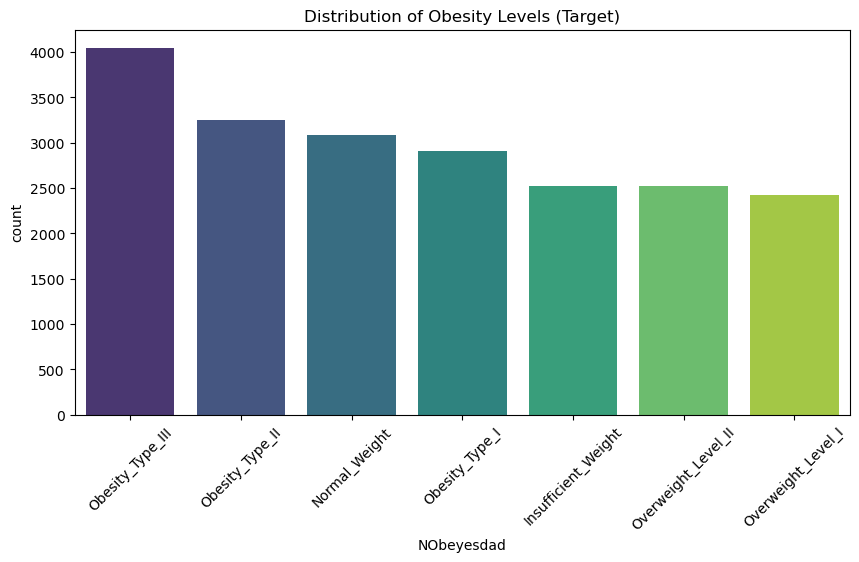


Summary statistics (numerical features):
                id           Age        Height        Weight          FCVC  \
count  20758.00000  20758.000000  20758.000000  20758.000000  20758.000000   
mean   10378.50000     23.841804      1.700245     87.887768      2.445908   
std     5992.46278      5.688072      0.087312     26.379443      0.533218   
min        0.00000     14.000000      1.450000     39.000000      1.000000   
25%     5189.25000     20.000000      1.631856     66.000000      2.000000   
50%    10378.50000     22.815416      1.700000     84.064875      2.393837   
75%    15567.75000     26.000000      1.762887    111.600553      3.000000   
max    20757.00000     61.000000      1.975663    165.057269      3.000000   

                NCP          CH2O           FAF           TUE  
count  20758.000000  20758.000000  20758.000000  20758.000000  
mean       2.761332      2.029418      0.981747      0.616756  
std        0.705375      0.608467      0.838302      0.602113  

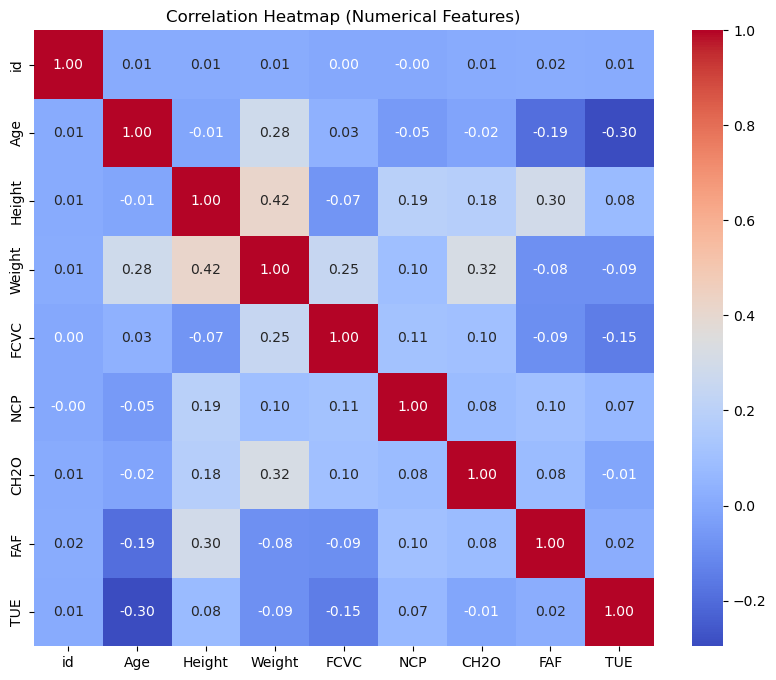

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Target variable distribution
plt.figure(figsize=(10,5))
sns.countplot(data=train, x="NObeyesdad", order=train["NObeyesdad"].value_counts().index, palette="viridis")
plt.xticks(rotation=45)
plt.title("Distribution of Obesity Levels (Target)")
plt.show()

# 2. Summary statistics for numerical variables
print("\nSummary statistics (numerical features):")
print(train.describe())

# 3. Frequency of categorical variables
cat_cols = train.select_dtypes(include="object").columns.drop("NObeyesdad")
for col in cat_cols:
    print(f"\n{col} value counts:")
    print(train[col].value_counts())

# 4. Correlation heatmap (numerical features only)
plt.figure(figsize=(10,8))
sns.heatmap(train.select_dtypes(include="number").corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap (Numerical Features)")
plt.show()


# Step 1: Multinomial Logistic Regression

In [18]:
# --- Separate features and target ---
X = train.drop(columns=["id", "NObeyesdad"])
y = train["NObeyesdad"]

In [19]:
# Identify categorical and numerical columns
cat_cols = X.select_dtypes(include="object").columns
num_cols = X.select_dtypes(include="number").columns

In [20]:
# --- Preprocessing pipeline ---
preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), num_cols),
        ("cat", OneHotEncoder(handle_unknown="ignore"), cat_cols)
    ]
)

In [21]:
# --- Logistic Regression Model (multinomial) ---
log_reg = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("classifier", LogisticRegression(multi_class="multinomial", max_iter=500, solver="lbfgs"))
])

# --- Train-test split ---
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Fit model
log_reg.fit(X_train, y_train)

# Predict on validation
y_pred = log_reg.predict(X_val)

# Evaluate
print("Accuracy:", accuracy_score(y_val, y_pred))
print("\nClassification Report:\n", classification_report(y_val, y_pred))

C:\Users\alber\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Accuracy: 0.8684971098265896

Classification Report:
                      precision    recall  f1-score   support

Insufficient_Weight       0.89      0.95      0.92       505
      Normal_Weight       0.87      0.82      0.84       617
     Obesity_Type_I       0.81      0.85      0.83       582
    Obesity_Type_II       0.93      0.96      0.95       650
   Obesity_Type_III       1.00      1.00      1.00       809
 Overweight_Level_I       0.75      0.71      0.73       485
Overweight_Level_II       0.73      0.70      0.72       504

           accuracy                           0.87      4152
          macro avg       0.85      0.85      0.85      4152
       weighted avg       0.87      0.87      0.87      4152



# Step 2: Preprocessing + LDA/QDA
Why LDA/QDA?

LDA assumes that each class has a Gaussian distribution with the same covariance matrix.

QDA relaxes this and allows each class to have its own covariance matrix.

They are interpretable and often perform well when Gaussian assumptions are not too badly violated.

In [22]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.metrics import accuracy_score, classification_report

# --- Use same preprocessing but only scale numerics ---
# (LDA/QDA require numeric input; categorical variables will be one-hot encoded)
lda_model = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("classifier", LinearDiscriminantAnalysis())
])

qda_model = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("classifier", QuadraticDiscriminantAnalysis())
])

# --- Train and evaluate LDA ---
lda_model.fit(X_train, y_train)
y_pred_lda = lda_model.predict(X_val)
print("LDA Accuracy:", accuracy_score(y_val, y_pred_lda))
print("\nLDA Classification Report:\n", classification_report(y_val, y_pred_lda))

# --- Train and evaluate QDA ---
qda_model.fit(X_train, y_train)
y_pred_qda = qda_model.predict(X_val)
print("QDA Accuracy:", accuracy_score(y_val, y_pred_qda))
print("\nQDA Classification Report:\n", classification_report(y_val, y_pred_qda))


LDA Accuracy: 0.8229768786127167

LDA Classification Report:
                      precision    recall  f1-score   support

Insufficient_Weight       0.81      0.93      0.87       505
      Normal_Weight       0.79      0.72      0.75       617
     Obesity_Type_I       0.78      0.78      0.78       582
    Obesity_Type_II       0.91      0.94      0.93       650
   Obesity_Type_III       0.99      1.00      0.99       809
 Overweight_Level_I       0.68      0.60      0.64       485
Overweight_Level_II       0.66      0.68      0.67       504

           accuracy                           0.82      4152
          macro avg       0.80      0.81      0.80      4152
       weighted avg       0.82      0.82      0.82      4152

QDA Accuracy: 0.6832851637764933

QDA Classification Report:
                      precision    recall  f1-score   support

Insufficient_Weight       0.79      0.88      0.83       505
      Normal_Weight       0.68      0.63      0.65       617
     Obesity_Type_

C:\Users\alber\anaconda3\Lib\site-packages\sklearn\discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 0 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
C:\Users\alber\anaconda3\Lib\site-packages\sklearn\discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 1 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
C:\Users\alber\anaconda3\Lib\site-packages\sklearn\discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 2 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
C:\Users\alber\anaconda3\Lib\site-packages\sklearn\discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 3 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
C:\U

# Step 3: Naïve Bayes
Why Naïve Bayes?

Based on Bayes’ theorem.

Assumes independence between predictors (strong assumption, often violated in reality).

Still works surprisingly well, especially for categorical features.

Computationally very fast compared to Logistic Regression and SVM.

Since our dataset has both numerical and categorical features, the best fit is:

Use GaussianNB (for numerical features).

Apply OneHotEncoder for categorical features so they can also be included numerically.

In [23]:
from sklearn.naive_bayes import GaussianNB

# Build Naïve Bayes pipeline
nb_model = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("classifier", GaussianNB())
])

# Train and predict
nb_model.fit(X_train, y_train)
y_pred_nb = nb_model.predict(X_val)

# Evaluate
nb_acc = accuracy_score(y_val, y_pred_nb)
print("Naïve Bayes Accuracy:", nb_acc)
print("\nClassification Report:\n", classification_report(y_val, y_pred_nb))


Naïve Bayes Accuracy: 0.5859826589595376

Classification Report:
                      precision    recall  f1-score   support

Insufficient_Weight       0.56      0.75      0.64       505
      Normal_Weight       0.49      0.20      0.28       617
     Obesity_Type_I       0.40      0.41      0.40       582
    Obesity_Type_II       0.48      0.96      0.64       650
   Obesity_Type_III       0.96      1.00      0.98       809
 Overweight_Level_I       0.60      0.24      0.34       485
Overweight_Level_II       0.51      0.30      0.38       504

           accuracy                           0.59      4152
          macro avg       0.57      0.55      0.52      4152
       weighted avg       0.59      0.59      0.55      4152



# Step 4: Support Vector Machine (SVM)
Why SVM?

Works well for high-dimensional data.

Finds the maximum-margin hyperplane separating classes.

Can model nonlinear decision boundaries with kernels (e.g., RBF).

⚠️ Challenges:

Computationally expensive for large datasets.

Sensitive to scaling (we already standardized our numeric features).

In [24]:
from sklearn.svm import SVC

# Build SVM pipeline
svm_model = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("classifier", SVC(kernel="linear", probability=True))  # linear kernel for speed
])

# Train and predict
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_val)

# Evaluate
svm_acc = accuracy_score(y_val, y_pred_svm)
print("SVM Accuracy:", svm_acc)
print("\nClassification Report:\n", classification_report(y_val, y_pred_svm))


SVM Accuracy: 0.8745183044315993

Classification Report:
                      precision    recall  f1-score   support

Insufficient_Weight       0.89      0.95      0.92       505
      Normal_Weight       0.88      0.81      0.84       617
     Obesity_Type_I       0.82      0.85      0.83       582
    Obesity_Type_II       0.94      0.97      0.95       650
   Obesity_Type_III       1.00      1.00      1.00       809
 Overweight_Level_I       0.76      0.73      0.74       485
Overweight_Level_II       0.74      0.73      0.73       504

           accuracy                           0.87      4152
          macro avg       0.86      0.86      0.86      4152
       weighted avg       0.87      0.87      0.87      4152



# Python Code – Create Combined Submission

In [25]:
# Predict with all four models on the test set
X_test = test.drop(columns=["id"])
test_ids = test["id"]

# Logistic Regression
y_pred_log = log_reg.predict(X_test)

# LDA
y_pred_lda = lda_model.predict(X_test)

# Naive Bayes
y_pred_nb = nb_model.predict(X_test)

# SVM
y_pred_svm = svm_model.predict(X_test)

# Combine results into one DataFrame
submission_all = pd.DataFrame({
    "id": test_ids,
    "Logistic_Regression": y_pred_log,
    "LDA": y_pred_lda,
    "Naive_Bayes": y_pred_nb,
    "SVM": y_pred_svm
})

# Save to CSV
submission_all_Assignment_5 = "C:\\Users\\alber\\OneDrive\\Desktop\\PhD DS Courses\\Predictive Analysis\\submission_all_models.csv"
submission_all.to_csv(submission_all_Assignment_5, index=False)

submission_all_Assignment_5

'C:\\Users\\alber\\OneDrive\\Desktop\\PhD DS Courses\\Predictive Analysis\\submission_all_models.csv'

# Assumption checks for the four classifiers on the Obesity dataset
 - Multicollinearity (VIF) for Logistic Regression
 - Linearity of log-odds check via Box–Tidwell (one-vs-rest for a few classes)
 - Normality (Shapiro) per class for LDA/QDA
 - Equality of covariance matrices across classes (Box's M test)
 - Feature independence proxies for Naive Bayes (Spearman for numeric, Cramér’s V for categorical)


In [26]:
from scipy import stats
from sklearn.metrics import mutual_info_score
import statsmodels.api as sm

In [27]:
# Features/target
X = train.drop(columns=["id", "NObeyesdad"])
y = train["NObeyesdad"]

In [28]:
# Identify columns
num_cols = X.select_dtypes(include="number").columns.tolist()
cat_cols = X.select_dtypes(include="object").columns.tolist()

In [29]:
# -----------------------------
# 1) Variance Inflation Factors (VIF) for numeric features
# -----------------------------
def compute_vif(df_num: pd.DataFrame) -> pd.DataFrame:
    # Add intercept
    X_mat = sm.add_constant(df_num)
    vifs = []
    for i, col in enumerate(df_num.columns):
        # Regress col on others
        y_vec = df_num[col].values
        X_others = np.delete(X_mat.values, i+1, axis=1)  # remove the current feature column (offset by const)
        model = sm.OLS(y_vec, X_others).fit()
        r2 = model.rsquared
        vif = np.inf if (1 - r2) == 0 else 1.0 / (1.0 - r2)
        vifs.append((col, vif))
    return pd.DataFrame(vifs, columns=["feature", "VIF"]).sort_values("VIF", ascending=False)

vif_df = compute_vif(X[num_cols])
vif_df

,feature,VIF
2,Weight,1.667031
1,Height,1.504341
0,Age,1.251635
6,FAF,1.201780
3,FCVC,1.155242
5,CH2O,1.141249
7,TUE,1.135816
4,NCP,1.066716


In [30]:
# -----------------------------
# 2) Linearity of log-odds (Box–Tidwell proxy) for a few classes
#    We do one-vs-rest (binary) for selected classes and test interaction: x * log(x)
#    Works only for positive numeric values; we will shift+scale if needed.
# -----------------------------
def box_tidwell_one_vs_rest(data: pd.DataFrame, target: pd.Series, class_name: str, numeric_cols: list) -> pd.DataFrame:
    # Binary target: 1 for class_name, 0 otherwise
    y_bin = (target == class_name).astype(int).values
    df = data[numeric_cols].copy()
    # Ensure positive values: shift each column if min <= 0
    for c in df.columns:
        min_val = df[c].min()
        if min_val <= 0:
            df[c] = df[c] - min_val + 1e-6
    # Construct Box–Tidwell terms: x * log(x)
    X_bt = df.copy()
    for c in df.columns:
        X_bt[f"{c}_logterm"] = df[c] * np.log(df[c])
    # Add intercept
    X_bt = sm.add_constant(X_bt)
    # Fit logistic regression
    logit_model = sm.Logit(y_bin, X_bt).fit(disp=False)
    # Extract p-values for the log terms; if not significant, linearity holds approximately
    pvals = logit_model.pvalues[[f"{c}_logterm" for c in df.columns]]
    out = pd.DataFrame({"feature": df.columns, "p_value_log_term": pvals.values})
    out["approx_linear"] = out["p_value_log_term"] > 0.05
    return out

In [31]:
# Choose a few representative classes for the check
classes_to_check = ["Obesity_Type_III", "Obesity_Type_II", "Normal_Weight"]
bt_results = {}
for cls in classes_to_check:
    try:
        bt_results[cls] = box_tidwell_one_vs_rest(X[num_cols], y, cls, num_cols)
    except Exception as e:
        bt_results[cls] = pd.DataFrame({"feature": num_cols, "p_value_log_term": np.nan, "approx_linear": False})
        bt_results[cls]["error"] = str(e)

C:\Users\alber\anaconda3\Lib\site-packages\statsmodels\discrete\discrete_model.py:2383: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
C:\Users\alber\anaconda3\Lib\site-packages\statsmodels\discrete\discrete_model.py:2441: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q * linpred)))


In [32]:
bt_results[cls]

,feature,p_value_log_term,approx_linear
0,Age,1.214281e-29,False
1,Height,1.892623e-02,False
2,Weight,0.000000e+00,False
3,FCVC,9.021231e-01,True
4,NCP,2.578163e-46,False
5,CH2O,1.490078e-02,False
6,FAF,1.941447e-10,False
7,TUE,6.461332e-02,True


In [33]:
# -----------------------------
# 3) Normality checks for LDA/QDA (Shapiro on numeric features per class, subsample ≤ 500 to respect Shapiro limits)
# -----------------------------
def shapiro_by_class(df: pd.DataFrame, target: pd.Series, numeric_cols: list, max_n=500):
    results = []
    for cls in target.unique():
        cls_idx = target == cls
        for col in numeric_cols:
            vec = df.loc[cls_idx, col].dropna().values
            if len(vec) > max_n:
                vec = np.random.RandomState(42).choice(vec, size=max_n, replace=False)
            # Shapiro-Wilk test
            stat, p = stats.shapiro(vec)
            results.append((cls, col, stat, p, p > 0.05))
    return pd.DataFrame(results, columns=["class", "feature", "W_stat", "p_value", "normal_fail_reject_H0_is_normal"])

shapiro_df = shapiro_by_class(X, y, num_cols, max_n=500)
shapiro_df

C:\Users\alber\anaconda3\Lib\site-packages\scipy\stats\_morestats.py:1879: UserWarning: Input data for shapiro has range zero. The results may not be accurate.
  warnings.warn("Input data for shapiro has range zero. The results "


,class,feature,W_stat,p_value,normal_fail_reject_H0_is_normal
0,Overweight_Level_II,Age,0.866923,3.178584e-20,False
1,Overweight_Level_II,Height,0.932420,2.974075e-14,False
2,Overweight_Level_II,Weight,0.928833,1.141968e-14,False
3,Overweight_Level_II,FCVC,0.710846,1.836939e-28,False
4,Overweight_Level_II,NCP,0.680291,1.225326e-29,False
5,Overweight_Level_II,CH2O,0.825501,6.245293e-23,False
6,Overweight_Level_II,FAF,0.895864,6.230132e-18,False
7,Overweight_Level_II,TUE,0.847112,1.376897e-21,False
8,Normal_Weight,Age,0.776581,1.472844e-25,False
9,Normal_Weight,Height,0.974717,1.332030e-07,False


In [34]:
# -----------------------------
# 4) Equality of covariance matrices (Box's M test)
# -----------------------------
def box_m_test(df_num: pd.DataFrame, target: pd.Series):
    # Compute pooled covariance and class covariances
    classes = target.unique()
    n_groups = len(classes)
    ns = []
    covs = []
    for cls in classes:
        group = df_num[target == cls]
        ns.append(group.shape[0])
        covs.append(np.cov(group.T, bias=False))
    N = sum(ns)
    p = df_num.shape[1]
    # Pooled covariance
    Sp = np.zeros((p, p))
    for i, cov in enumerate(covs):
        Sp += (ns[i] - 1) * cov
    Sp /= (N - n_groups)
    # Log determinants
    logdet_Sp = np.log(np.linalg.det(Sp) + 1e-12)
    logdet_sum = 0.0
    for i, cov in enumerate(covs):
        logdet_sum += (ns[i] - 1) * np.log(np.linalg.det(cov) + 1e-12)
    M = (N - n_groups) * logdet_Sp - logdet_sum
    # Correction factor (approximation)
    c = ((2 * p**2 + 3*p - 1) / (6 * (p + 1) * (n_groups - 1))) * (sum(1/(ns[i]-1) for i in range(n_groups)) - 1/(N - n_groups))
    chi2 = M * (1 - c)
    df = (n_groups - 1) * p * (p + 1) / 2
    p_value = 1 - stats.chi2.cdf(chi2, df)
    return {"chi2": chi2, "df": df, "p_value": p_value}

box_m_result = box_m_test(X[num_cols], y)
box_m_result


{'chi2': 101481.20926556001, 'df': 216.0, 'p_value': 0.0}

In [35]:
#-----------------------------
# 5) Naive Bayes independence proxies
#    a) Spearman correlation among numeric features
#    b) Cramér’s V among categorical features
# -----------------------------
from itertools import combinations
# a) Spearman correlation
spearman_corr = X[num_cols].corr(method="spearman")

# b) Cramér’s V for categorical pairs
def cramers_v(confusion_matrix):
    chi2 = stats.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r,k = confusion_matrix.shape
    phi2corr = max(0, phi2 - (k-1)*(r-1)/(n-1))
    rcorr = r - (r-1)**2/(n-1)
    kcorr = k - (k-1)**2/(n-1)
    return np.sqrt(phi2corr / max((kcorr-1), (rcorr-1)))

def cramers_v_matrix(df_cat: pd.DataFrame) -> pd.DataFrame:
    cols = df_cat.columns
    res = pd.DataFrame(np.ones((len(cols), len(cols))), index=cols, columns=cols)
    for c1, c2 in combinations(cols, 2):
        tbl = pd.crosstab(df_cat[c1], df_cat[c2])
        cv = cramers_v(tbl)
        res.loc[c1, c2] = cv
        res.loc[c2, c1] = cv
    return res

cramers_df = cramers_v_matrix(X[cat_cols])
cramers_df

,Gender,family_history_with_overweight,FAVC,CAEC,SMOKE,SCC,CALC,MTRANS
Gender,1.000000,0.095411,0.020497,0.040870,0.062520,0.060780,0.060837,0.084128
family_history_with_overweight,0.095411,1.000000,0.151775,0.194007,0.016827,0.166269,0.010644,0.066277
FAVC,0.020497,0.151775,1.000000,0.078735,0.013536,0.111202,0.082781,0.061753
CAEC,0.040870,0.194007,0.078735,1.000000,0.011961,0.073827,0.080282,0.060537
SMOKE,0.062520,0.016827,0.013536,0.011961,1.000000,0.014348,0.014981,0.021354
SCC,0.060780,0.166269,0.111202,0.073827,0.014348,1.000000,0.000000,0.024577
CALC,0.060837,0.010644,0.082781,0.080282,0.014981,0.000000,1.000000,0.052553
MTRANS,0.084128,0.066277,0.061753,0.060537,0.021354,0.024577,0.052553,1.000000


In [36]:
# Show top VIF values
print("VIF (Multicollinearity) for Numeric Features:")
print(vif_df.head())

# Show Box–Tidwell results
for cls in classes_to_check:
    print(f"\nBox–Tidwell (one-vs-rest) – {cls}")
    print(bt_results[cls])

# Shapiro normality results
print("\nShapiro Normality per Class (numeric features; p>0.05 means normal not rejected):")
print(shapiro_df.head(20))  # show first 20 rows

# Box's M Test
print("\nBox's M Test (Equality of Covariance Matrices):")
print(box_m_result)

# Spearman correlations
print("\nSpearman Correlation (Numeric Features):")
print(spearman_corr)

# Cramér’s V
print("\nCramér’s V (Categorical Features):")
print(cramers_df)


VIF (Multicollinearity) for Numeric Features:
  feature       VIF
2  Weight  1.667031
1  Height  1.504341
0     Age  1.251635
6     FAF  1.201780
3    FCVC  1.155242

Box–Tidwell (one-vs-rest) – Obesity_Type_III
  feature  p_value_log_term  approx_linear            error
0     Age               NaN          False  Singular matrix
1  Height               NaN          False  Singular matrix
2  Weight               NaN          False  Singular matrix
3    FCVC               NaN          False  Singular matrix
4     NCP               NaN          False  Singular matrix
5    CH2O               NaN          False  Singular matrix
6     FAF               NaN          False  Singular matrix
7     TUE               NaN          False  Singular matrix

Box–Tidwell (one-vs-rest) – Obesity_Type_II
  feature  p_value_log_term  approx_linear
0     Age     1.561783e-104          False
1  Height      2.317708e-05          False
2  Weight     2.482698e-115          False
3    FCVC      3.880105e-03    